Set up notebook

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Stuff in comments should be uncommented, executed once, and commented again

In [2]:
#! pip install kaggle --upgrade

In [3]:
#! pip install wordcloud

To download the dataset, go to kaggle.com
1. Create account 
2. Click top-right profile picture
3. Select My Account
4. Click 'Create New API Token'

This should download the kaggle.json file

In [4]:
#! mkdir -p ~/.kaggle/
#! mv ~/Downloads/kaggle.json ~/.kaggle/

In [5]:
from pathlib import Path
import os
path = Path(os.getcwd(), 'gun-data')
path.mkdir(parents=True, exist_ok=True)

In [6]:
#! kaggle datasets download jameslko/gun-violence-data -p {path}
#! unzip -q -n {path}/gun-violence-data.zip -d {path}

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Show input data

In [8]:
fname = 'gun-violence-data_01-2013_03-2018.csv'
df = pd.read_csv(path/fname)
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


Select columns which interest us for the report

In [27]:
trimmed_df = df[['incident_id', 'date', 'state', 'location_description', 'participant_gender']]
trimmed_df.date = pd.to_datetime(trimmed_df.date)
trimmed_df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,incident_id,date,state,location_description,participant_gender
0,461105,2013-01-01,Pennsylvania,NaN,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,NaN,0::Male
2,478855,2013-01-01,Ohio,Cotton Club,0::Male||1::Male||2::Male||3::Male||4::Male
3,478925,2013-01-05,Colorado,NaN,0::Female||1::Male||2::Male||3::Male
4,478959,2013-01-07,North Carolina,NaN,0::Female||1::Male||2::Male||3::Female


## Has gun violence risen over the past 4 years, from 2014-2018?

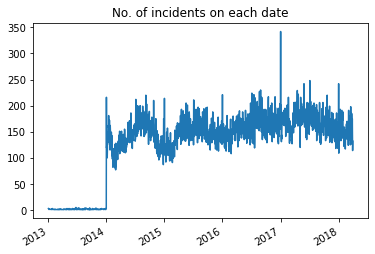

In [10]:
trimmed_df.date.value_counts().sort_index().plot(title="No. of incidents on each date")

We can see that the number of incidents before 2014 is not covered well by the dataset, so we will remove it.

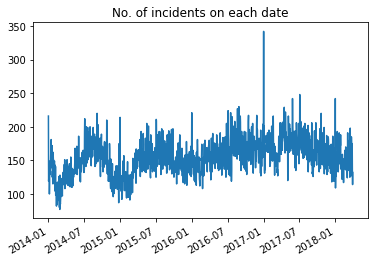

In [11]:
trimmed_df = trimmed_df[(trimmed_df.date.dt.year > 2013)]
trimmed_df.date.value_counts().plot(title="No. of incidents on each date")

In [12]:
X = pd.DataFrame(trimmed_df.date.map(dt.datetime.toordinal).unique())
y = pd.DataFrame(trimmed_df.date.map(dt.datetime.toordinal).value_counts()).sort_index()

Plot of time vs no. of occurrences, with regression line

'The gradient is 0.02. This is small but positive.'

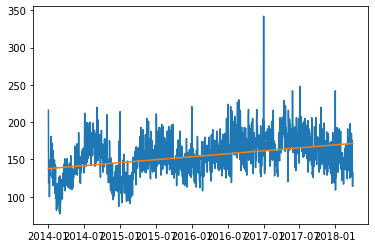

In [13]:
m, b = np.polyfit(X.to_numpy().reshape(-1), y.to_numpy().reshape(-1), 1)
plt.plot(trimmed_df.date.unique(), y, trimmed_df.date.unique(), m*X + b)
f'The gradient is {m:.2f}. This is small but positive.'

## Which day of the year  is the most dangerous?

Most frequent date in dataset.

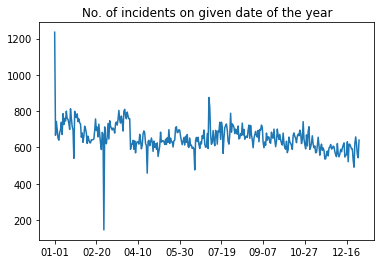

In [14]:
danger_days = trimmed_df.date.apply(lambda dt: dt.replace(year=2016)).value_counts().sort_index()
danger_days.index = danger_days.index.strftime("%m-%d")
danger_days.plot(title="No. of incidents on given date of the year")

In [15]:
print("5 days with largest amount of incidents (mm-dd):")
danger_days.sort_values(0, ascending=False).head()

5 days with largest amount of incidents (mm-dd):


01-01    1235
07-04     875
07-05     820
01-20     813
03-25     810
Name: date, dtype: int64

In [16]:
print("5 days with smallest amount of incidents (mm-dd):")
danger_days.sort_values(0).head()

5 days with smallest amount of incidents (mm-dd):


02-29    145
04-21    458
06-17    476
12-25    491
12-18    521
Name: date, dtype: int64

The most dangerous day is New Year's day.

It is 2.7x more dangerous than the least dangerous day, 21st of April. 

We are omitting 29.02 because it does not appear every year, so the sum is lower.

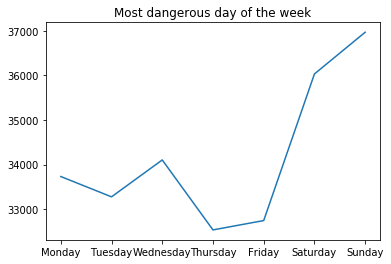

In [17]:
danger_day = trimmed_df.date.apply(lambda dt: dt.weekday()).value_counts().sort_index()
danger_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday','Sunday']
danger_day.plot(title="Most dangerous day of the week")

Sunday is the most dangerous day. Surprising, we expected "black" Monday.

## Which states are most likely to have a gun incident per 10’000 people.

Plot of State vs (No. of Incidents/State Population)* 10000

State population data from the US Census via Wikipedia

In [18]:
state_pop = {'California': 39512223, 'Texas': 28995881, 'Florida': 21477737, 'New York': 19453561, 
             'Pennsylvania': 12801989, 'Illinois': 12671821, 'Ohio': 11689100, 'Georgia': 10617423, 
             'North Carolina': 10488084, 'Michigan': 9986857, 'New Jersey': 8882190, 'Virginia': 8535519, 
             'Washington': 7614893, 'Arizona': 7278717, 'Massachusetts': 6892503, 'Tennessee': 6829174, 
             'Indiana': 6732219, 'Missouri': 6137428, 'Maryland': 6045680, 'Wisconsin': 5822434, 
             'Colorado': 5758736, 'Minnesota': 5639632, 'South Carolina': 5148714, 'Alabama': 4903185, 
             'Louisiana': 4648794, 'Kentucky': 4467673, 'Oregon': 4217737, 'Oklahoma': 3956971, 
             'Connecticut': 3565287, 'Utah': 3205958, 'Puerto Rico': 3193694, 'Iowa': 3155070, 
             'Nevada': 3080156, 'Arkansas': 3017804, 'Mississippi': 2976149, 'Kansas': 2913314, 
             'New Mexico': 2096829, 'Nebraska': 1934408, 'West Virginia': 1792147, 'Idaho': 1787065, 
             'Hawaii': 1415872, 'New Hampshire': 1359711, 'Maine': 1344212, 'Montana': 1068778, 
             'Rhode Island': 1059361, 'Delaware': 973764, 'South Dakota': 884659, 'North Dakota': 762062, 
             'Alaska': 731545, 'District of Columbia': 705749, 'Vermont': 623989, 'Wyoming': 578759, 
             'Guam': 168485, 'U.S. Virgin Islands': 106235, 'Northern Mariana Islands': 51433, 
             'American Samoa': 49437}

In [19]:
y = pd.DataFrame(trimmed_df.state.value_counts())
y['Population'] = pd.Series(state_pop)
y['Incidents per 10k'] = (y['state']/y['Population']) * 10000
y = y.sort_index();

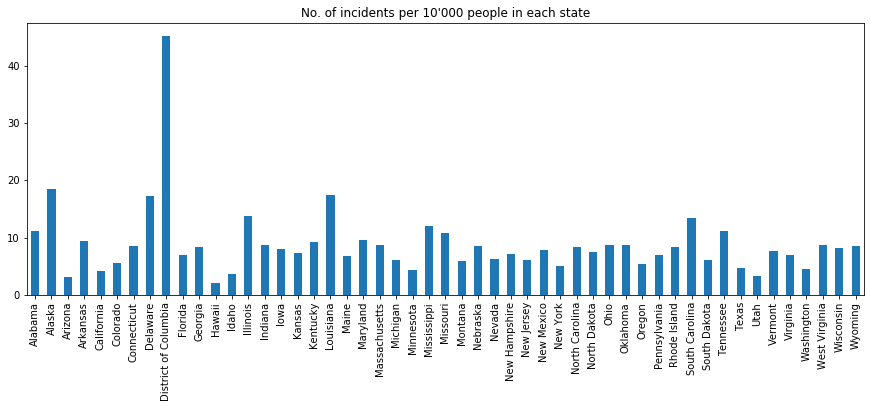

In [20]:
y['Incidents per 10k'].plot(kind='bar', figsize=(15, 5), title="No. of incidents per 10'000 people in each state")

The 5 most dangerous states are D.C., Alaska, Louisiana, Delaware and Illinois:

In [21]:
y['Incidents per 10k'].sort_values(0, ascending=False)[:5]

District of Columbia    45.186036
Alaska                  18.440424
Louisiana               17.410967
Delaware                17.273179
Illinois                13.840158
Name: Incidents per 10k, dtype: float64

It is funny that the President, the most important person, lives in the most dangerous state.

In [22]:
y['Incidents per 10k'].sort_values(0)[:5]

Hawaii        2.041145
Arizona       3.191497
Utah          3.340655
Idaho         3.698802
California    4.116954
Name: Incidents per 10k, dtype: float64

The safest is Hawaii with its good vibes.

## What words are most often used to describe the location?

Word cloud of most frequently used words in location_description

(-0.5, 399.5, 199.5, -0.5)

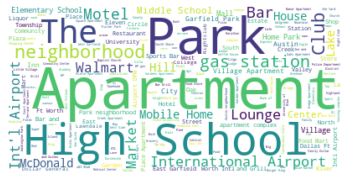

In [23]:
wordcloud = WordCloud(background_color='white').generate(' '.join(trimmed_df.location_description.dropna()))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The most dangourous places are Apartments, High Schools, Parks, Clubs and neigborhoods.

## The gender split of perpetrators.

Pie chart showing frequency of participant_gender values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11868c1d0>],
      dtype=object)

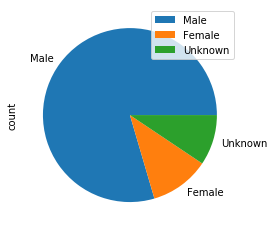

In [24]:
male_count = trimmed_df.participant_gender.str.count('Male').sum()
female_count = trimmed_df.participant_gender.str.count('Female').sum()
rowsWithNa = trimmed_df.participant_gender.shape[0] - trimmed_df.participant_gender.dropna().shape[0]
male_count, female_count, rowsWithNa
data = [{"count": male_count}, {"count": female_count}, {"count": rowsWithNa}]
gender_df = pd.DataFrame(data, index=["Male", "Female", "Unknown"])
gender_df.plot(kind='pie', subplots=True)

This chart shows that of 75% of perpetrators are male. We were worried that the results might be inconclusive if the male and female split is similar and Unknown would be the largest, but even if Unknown is all female (unliekley), male would still be majority gender.